In [1]:
from sys import argv
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn.metrics import RocCurveDisplay, accuracy_score, confusion_matrix, PrecisionRecallDisplay, ConfusionMatrixDisplay, make_scorer, precision_score,recall_score
from sklearn.model_selection import train_test_split, LeavePGroupsOut, GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.inspection import permutation_importance
from collections import Counter
complete_features=[
        "AF1",
        "AF2",
        "AF3",
        "AF4",
        "AF5",
        "BLOSUM1",
        "BLOSUM2",
        "BLOSUM3",
        "BLOSUM4",
        "BLOSUM5",
        "BLOSUM6",
        "BLOSUM7",
        "BLOSUM8",
        "BLOSUM9",
        "BLOSUM10",
        "PP1",
        "PP2",
        "PP3",
        "F1",
        "F2",
        "F3",
        "F4",
        "F5",
        "F6",
        "KF1",
        "KF2",
        "KF3",
        "KF4",
        "KF5",
        "KF6",
        "KF7",
        "KF8",
        "KF9",
        "KF10",
        "MSWHIM1",
        "MSWHIM2",
        "MSWHIM3",
        "E1",
        "E2",
        "E3",
        "E4",
        "E5",
        "PD1",
        "PD2",
        "PRIN1",
        "PRIN2",
        "PRIN3",
        "ProtFP1",
        "ProtFP2",
        "ProtFP3",
        "ProtFP4",
        "ProtFP5",
        "ProtFP6",
        "ProtFP7",
        "ProtFP8",
        "SV1",
        "SV2",
        "SV3",
        "SV4",
        "ST1",
        "ST2",
        "ST3",
        "ST4",
        "ST5",
        "ST6",
        "ST7",
        "ST8",
        "SVGER1",
        "SVGER2",
        "SVGER3",
        "SVGER4",
        "SVGER5",
        "SVGER6",
        "SVGER7",
        "SVGER8",
        "SVGER9",
        "SVGER10",
        "SVGER11",
        "T1",
        "T2",
        "T3",
        "T4",
        "T5",
        "VHSE1",
        "VHSE2",
        "VHSE3",
        "VHSE4",
        "VHSE5",
        "VHSE6",
        "VHSE7",
        "VHSE8",
        "VSTPV1",
        "VSTPV2",
        "VSTPV3",
        "VSTPV4",
        "VSTPV5",
        "VSTPV6",
        "Z1",
        "Z2",
        "Z3",
        "Z4",
        "Z5",
        "cys30",
        "cys20",
        "cys_ser30",
        "cys_ser20",
        "charge",
        "avgcharge",
        "avghydrop",
        "length",
        "entropy",
        "entropyratio",
        "boman",
        "instability",
        "aliphatic",
        "A",
        "R",
        "N",
        "D",
        "C",
        "E",
        "Q",
        "G",
        "H",
        "I",
        "L",
        "K",
        "M",
        "F",
        "P",
        "S",
        "T",
        "W",
        "Y",
        "V",
        "RHK",
        "DE",
        "STNQ",
        "CGP",
        "AVIL",
        "MFYW",
    "Alpha50_leader",
"Alpha50_total",
"Total_alpha",
"Beta50_leader",
"Beta50_total",
"Total_beta",
"Coil50_leader",
"Coil50_total",
"Total_coil"
    ]

original_features=[
        "cys30",
        "cys20",
        "cys_ser30",
        "cys_ser20",
        "charge",
        "avgcharge",
        "avghydrop",
        "length",
        "entropy",
        "entropyratio",
        "boman",
        "instability",
        "aliphatic",
        "A",
        "R",
        "N",
        "D",
        "C",
        "E",
        "Q",
        "G",
        "H",
        "I",
        "L",
        "K",
        "M",
        "F",
        "P",
        "S",
        "T",
        "W",
        "Y",
        "V",
        "RHK",
        "DE",
        "STNQ",
        "CGP",
        "AVIL",
        "MFYW"
    ]
feature_selection=['RHK','R','H','K','avghydrop','length','BLOSUM7','PP2','F3','F6','MSWHIM3','E4','PD1','PRIN3','ProtFP5','SV3','SV4','ST7','T3','VHSE5',"cys30",
        "cys20",
        "cys_ser30",
        "cys_ser20",
        "charge",
        "avgcharge"]
ripp_classes=['Guanidinotide',
              'Cyanobactin',
              'Thiopeptide',
              'TBA', 
              'Pearlin',
              'Ryptide',
              'Glycocin', 
              'Borosin',
              'Microcin', 
              'Head-to-tail cyclized peptide',
              'Pantocin', 
              'other',
              'Bottromycin',
              'Mycofactocin',
              'Cyptide', 
              'Streptide', 
              'Epipeptide', 
              'Dikaritin',
              'Proteusin', 
              'Rotapeptide',
              'Microviridin', 
              'Methanobactin', 
              'Ranthipeptide', 
              'Thioamitide',
              'Amatoxin',
              'Cyclotide',
              'Sulfatyrotide',
              'AIP',
              'Selidamide',
              'Graspetide', 
              'Crocagin', 
              'N-Formylated TBA', 
              'Linear azole-containing peptide', 
              'Lanthipeptide',
              'Lasso', 
              'Sactipeptide',
              'Bacteriocin', 
              'Lyciumin',
              'Linaridin']

In [2]:
def svm_training_split(dataset_file,feature_list):
    dataset = pd.read_csv(dataset_file)
    dataset = dataset.drop(labels="sequence", axis=1)
    x = dataset[feature_list]
    y = dataset[["RiPP"]].to_numpy().ravel()
    x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2,random_state=42)
    return x_train, x_test, y_train, y_test

def class_split_iterable(dataset,class_list):
    custom_cv=[]
    for category in class_list:
        positive_indices=dataset[dataset['Class'].str.contains(category, na=False)].index.tolist()
        negative_indices = dataset[dataset['Class'].str.contains('No_RiPP', na=False)].index.tolist()
        sample_size = min(len(positive_indices), len(negative_indices))  # Handle cases with fewer matches
        random_indices = random.sample(negative_indices, sample_size)
        validation_indices=positive_indices+random_indices
        all_indices = dataset.index.tolist()
        training_indices = list(set(all_indices) - set(validation_indices))
        training_indices.sort()
        validation_indices.sort()
        custom_cv.append((tuple(training_indices),tuple(validation_indices)))
    return custom_cv


def x_and_y(dataset,feature_list):
    dataset = dataset.drop(labels=["sequence","Class"], axis=1)
    x = dataset[feature_list]
    y = dataset[["RiPP"]].to_numpy().ravel()
    return x,y

def f_importances(coef, names):
    imp = coef
    imp, names = zip(*sorted(zip(imp, names, strict=False)), strict=False)
    fig=plt.figure(figsize=(5,5),dpi=300)
    plt.barh(range(len(names)), imp, align="center")
    plt.yticks(range(len(names)), names, fontsize=3)
    plt.title('Feature coefficients')
    plt.show()
    
def svc_classification(x_train, x_test, y_train, y_test,feature_list):
    for i in range(1,8):
            poly_svc = svm.SVC(C=1000,kernel="poly",random_state=0,degree=i,class_weight="balanced")
            poly_svc.fit(x_train, y_train)
            #f_importances(abs(poly_svc.coef_[0]),feature_list)
            y_pred = poly_svc.predict(x_test)
            print(
                pd.DataFrame(
                    confusion_matrix(y_test, y_pred),
                    index=poly_svc.classes_,
                    columns=poly_svc.classes_,
                )
            )
            fig,axes=plt.subplots(1,3,figsize=(15,5))
            RocCurveDisplay.from_estimator(
                poly_svc, x_test, y_test, name="Validation data", ax=axes[0], alpha=0.8
            )
            RocCurveDisplay.from_estimator(poly_svc,x_train,y_train,name='Training data', ax=axes[0],alpha=0.8)
            axes[0].set_title('ROC Curve')
            #plt.show()
            
            PrecisionRecallDisplay.from_estimator(poly_svc,x_test,y_test,name='Validation data',ax=axes[1], alpha=0.8)
            PrecisionRecallDisplay.from_estimator(poly_svc,x_train,y_train,name='Training data',ax=axes[1], alpha=0.8)
            axes[1].set_title('Precision-Recall Curve')
            #plt.show()
            
            ConfusionMatrixDisplay.from_estimator(poly_svc,x_test,y_test,ax=axes[2])
            axes[2].set_title('Confusion matrix')
            
            fig.suptitle(f'SVM with degree {i}')
            plt.tight_layout()
            plt.show()
            # Compute permutation importance
            perm_importance = permutation_importance(poly_svc, x_test, y_test, n_repeats=10, scoring='roc_auc', random_state=42,n_jobs=20)
            # Display feature importance
            for i in perm_importance.importances_mean.argsort()[::-1]:
                print(f"Feature {feature_list[i]}: {perm_importance.importances_mean[i]:.10f} ± {perm_importance.importances_std[i]:.10f}")

Regular 80/20 split

         No_RiPP  RiPP
No_RiPP     1731   100
RiPP          39   866


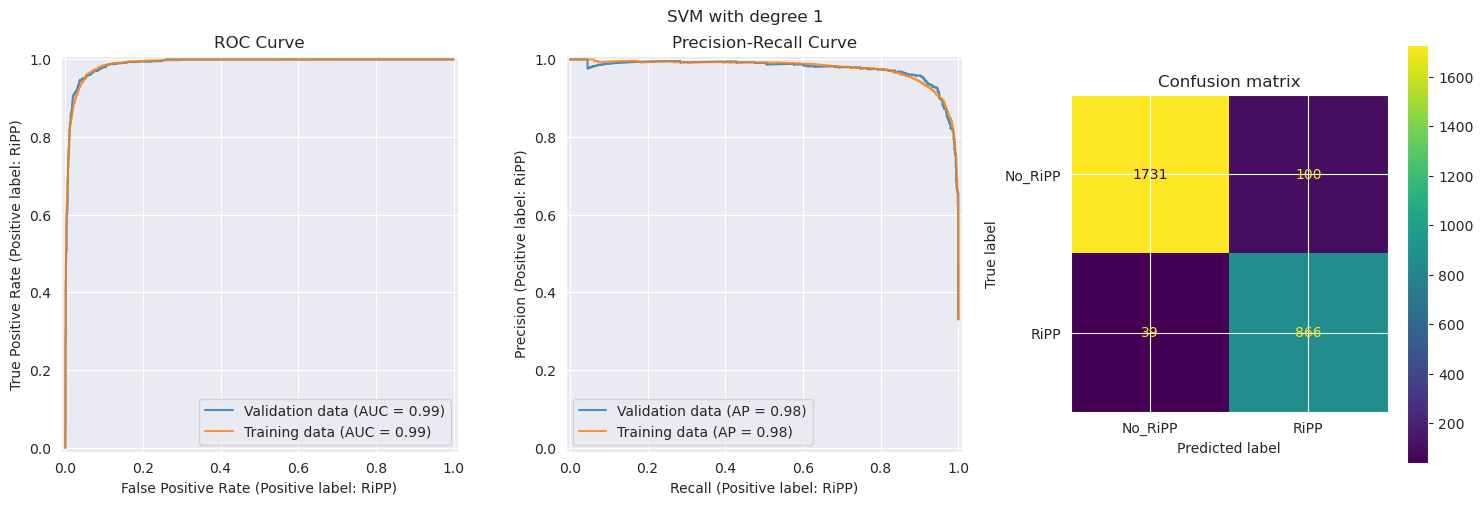

Feature boman: 0.0894874944 ± 0.0036905621
Feature length: 0.0475982994 ± 0.0012721789
Feature charge: 0.0270396879 ± 0.0019106989
Feature PRIN1: 0.0190054645 ± 0.0012865345
Feature PRIN2: 0.0072910676 ± 0.0007131372
Feature SVGER10: 0.0044476496 ± 0.0005742634
Feature SVGER11: 0.0022128415 ± 0.0004224251
Feature aliphatic: 0.0020115204 ± 0.0003096658
Feature ProtFP2: 0.0017000039 ± 0.0004033650
Feature instability: 0.0016797873 ± 0.0005726143
Feature ProtFP1: 0.0012985085 ± 0.0002306160
Feature SVGER3: 0.0011758813 ± 0.0002262942
Feature SVGER4: 0.0008122844 ± 0.0002371082
Feature PRIN3: 0.0007160293 ± 0.0001572260
Feature SVGER1: 0.0006471119 ± 0.0002492942
Feature SVGER7: 0.0005911693 ± 0.0002123759
Feature Z4: 0.0005813325 ± 0.0002209387
Feature entropy: 0.0005130789 ± 0.0001583172
Feature KF6: 0.0004707146 ± 0.0001555304
Feature entropyratio: 0.0004252725 ± 0.0001040974
Feature ProtFP6: 0.0004054784 ± 0.0002017151
Feature ProtFP7: 0.0004036076 ± 0.0001119455
Feature ProtFP3: 0.000

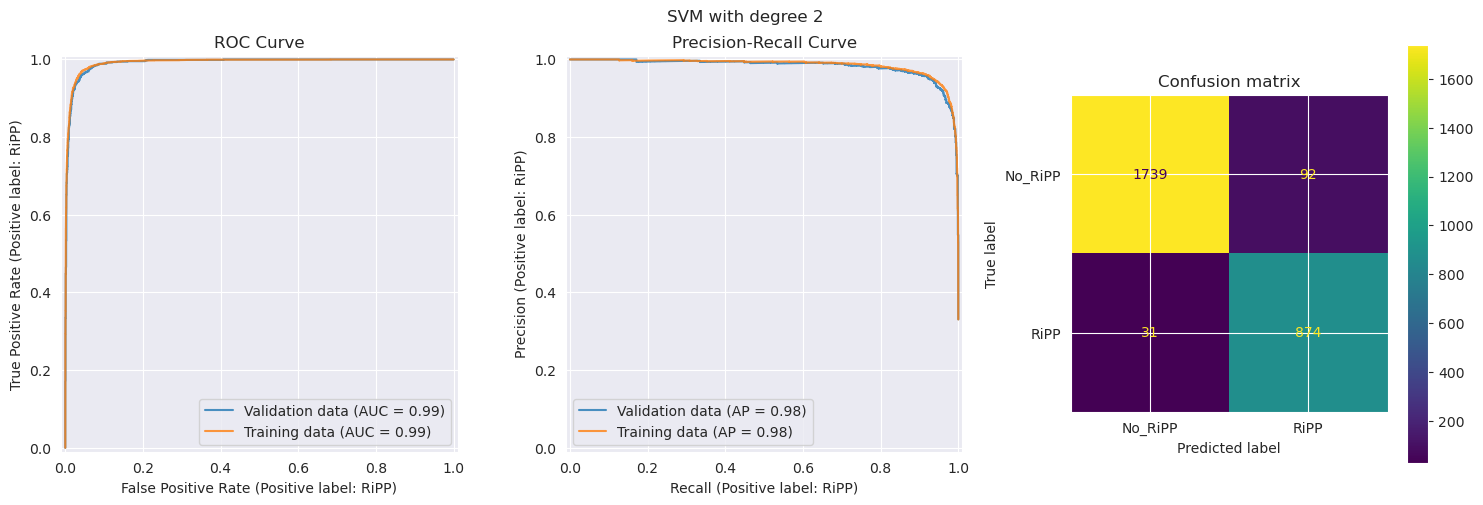

Feature length: 0.0366333043 ± 0.0011172515
Feature boman: 0.0350804892 ± 0.0020419639
Feature SVGER10: 0.0099802360 ± 0.0010561814
Feature charge: 0.0088083679 ± 0.0009605448
Feature PRIN1: 0.0065621238 ± 0.0006629178
Feature PRIN2: 0.0051784039 ± 0.0005096227
Feature aliphatic: 0.0034217935 ± 0.0008455156
Feature T1: 0.0027980363 ± 0.0004326250
Feature SVGER11: 0.0024350429 ± 0.0004520838
Feature instability: 0.0019386804 ± 0.0008712865
Feature ProtFP2: 0.0016549843 ± 0.0003162226
Feature SVGER1: 0.0011612167 ± 0.0002612748
Feature ProtFP1: 0.0010630305 ± 0.0002455717
Feature SVGER3: 0.0009475847 ± 0.0002493859
Feature SVGER4: 0.0007320216 ± 0.0001551506
Feature KF9: 0.0005790997 ± 0.0001150872
Feature ProtFP3: 0.0005173636 ± 0.0002100335
Feature ProtFP6: 0.0004319108 ± 0.0001363184
Feature PRIN3: 0.0003630537 ± 0.0001361814
Feature SVGER5: 0.0003544240 ± 0.0001493730
Feature Z4: 0.0003409060 ± 0.0001646955
Feature KF6: 0.0003366213 ± 0.0001277102
Feature F1: 0.0003277501 ± 0.0001017

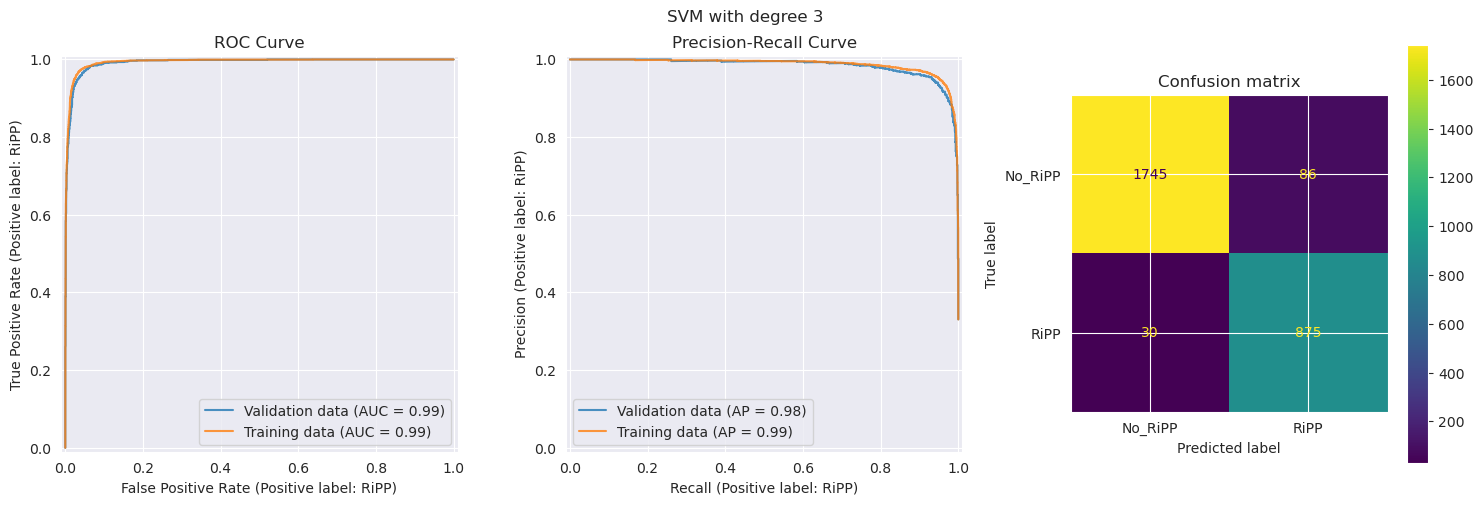

Feature length: 0.0364555793 ± 0.0013096398
Feature boman: 0.0328645700 ± 0.0020200673
Feature SVGER10: 0.0151128961 ± 0.0017681414
Feature aliphatic: 0.0087610852 ± 0.0011594287
Feature charge: 0.0082186469 ± 0.0012763523
Feature instability: 0.0041442197 ± 0.0008434565
Feature PRIN2: 0.0032980197 ± 0.0004045375
Feature PRIN1: 0.0031550552 ± 0.0004774511
Feature SVGER11: 0.0026792714 ± 0.0007675076
Feature T1: 0.0026137334 ± 0.0004126859
Feature ProtFP2: 0.0015451509 ± 0.0003003366
Feature SVGER1: 0.0012018310 ± 0.0003054559
Feature ProtFP1: 0.0010449864 ± 0.0002741234
Feature SVGER3: 0.0010066654 ± 0.0003369321
Feature ProtFP3: 0.0008819261 ± 0.0004424936
Feature SVGER4: 0.0008061289 ± 0.0001522637
Feature KF9: 0.0007189260 ± 0.0001356668
Feature SVGER5: 0.0004934055 ± 0.0002159749
Feature F1: 0.0004874310 ± 0.0001514206
Feature ProtFP7: 0.0004631711 ± 0.0001699154
Feature Z2: 0.0004189360 ± 0.0001134219
Feature ProtFP6: 0.0004185739 ± 0.0001611094
Feature AF3: 0.0003511048 ± 0.00013

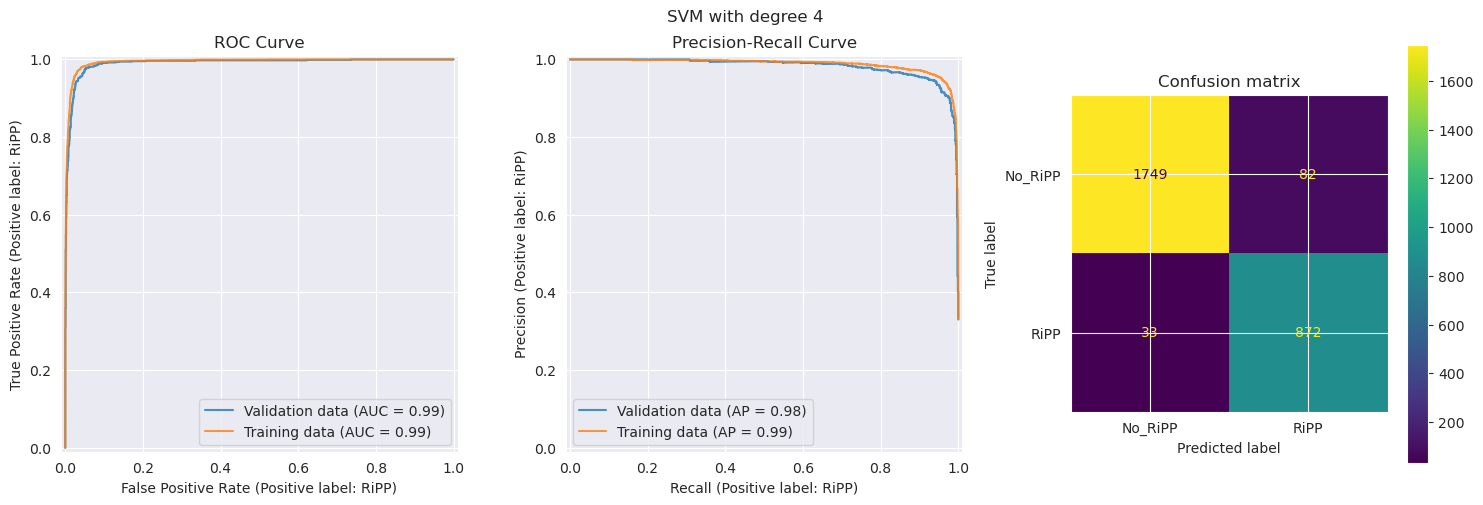

Feature length: 0.0384148384 ± 0.0012647957
Feature boman: 0.0247867452 ± 0.0020280103
Feature SVGER10: 0.0182339753 ± 0.0025223224
Feature aliphatic: 0.0114073462 ± 0.0010542686
Feature charge: 0.0108185003 ± 0.0019322111
Feature instability: 0.0036569697 ± 0.0010401799
Feature T1: 0.0028359348 ± 0.0004246269
Feature SVGER11: 0.0028093214 ± 0.0008697296
Feature PRIN2: 0.0022954579 ± 0.0003885734
Feature PRIN1: 0.0017630676 ± 0.0004006819
Feature ProtFP1: 0.0015061661 ± 0.0003463895
Feature SVGER1: 0.0013365278 ± 0.0004632312
Feature ProtFP2: 0.0013103971 ± 0.0003040728
Feature ProtFP3: 0.0010498746 ± 0.0005697596
Feature KF9: 0.0008664770 ± 0.0002052429
Feature SVGER4: 0.0007694977 ± 0.0001323412
Feature SVGER3: 0.0007328061 ± 0.0003467881
Feature F1: 0.0006998561 ± 0.0001610752
Feature cys_ser20: 0.0004361955 ± 0.0002223654
Feature entropy: 0.0004342041 ± 0.0002362744
Feature Total_coil: 0.0004269019 ± 0.0000905467
Feature Coil50_total: 0.0004269019 ± 0.0000905467
Feature Coil50_lead

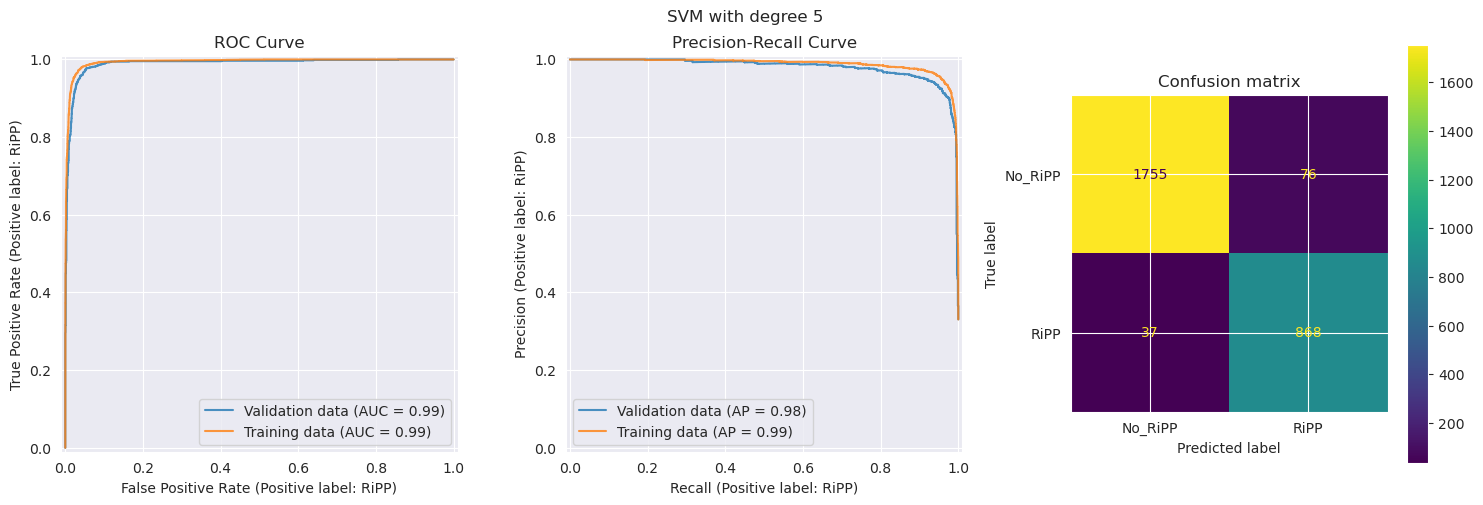

Feature length: 0.0417057973 ± 0.0012663491
Feature SVGER10: 0.0270070698 ± 0.0030131601
Feature boman: 0.0234522692 ± 0.0021197296
Feature aliphatic: 0.0160590928 ± 0.0018300640
Feature charge: 0.0150128089 ± 0.0020527832
Feature instability: 0.0053092987 ± 0.0017229043
Feature T1: 0.0042116888 ± 0.0005871159
Feature SVGER11: 0.0032318782 ± 0.0008832478
Feature PRIN2: 0.0016493719 ± 0.0003160495
Feature ProtFP3: 0.0015316329 ± 0.0007028938
Feature ProtFP1: 0.0015051401 ± 0.0005290056
Feature SVGER1: 0.0013922290 ± 0.0005606518
Feature ProtFP4: 0.0010447450 ± 0.0010852315
Feature KF9: 0.0010243474 ± 0.0003054307
Feature ProtFP2: 0.0010221749 ± 0.0003155788
Feature SVGER7: 0.0009955614 ± 0.0006213013
Feature SVGER4: 0.0009567576 ± 0.0002075812
Feature F1: 0.0009226006 ± 0.0002663433
Feature SVGER3: 0.0008315355 ± 0.0003968707
Feature PRIN1: 0.0007350390 ± 0.0005123807
Feature cys_ser20: 0.0006472326 ± 0.0002720573
Feature entropy: 0.0005699268 ± 0.0002117733
Feature AF3: 0.0005625643 ± 

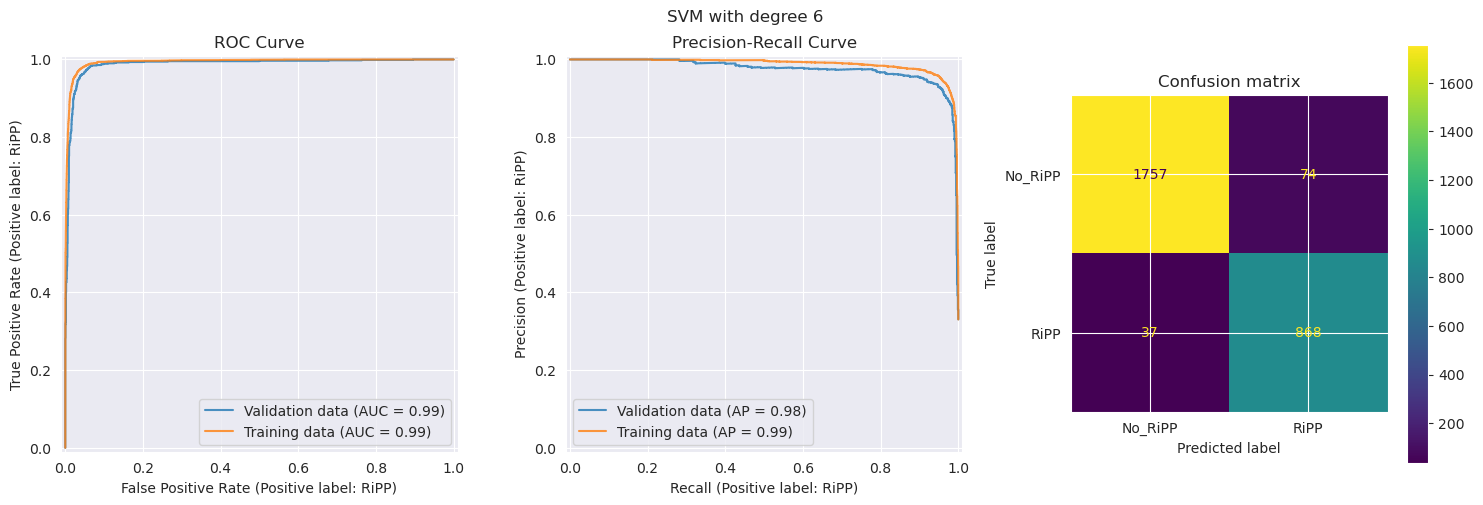

Feature length: 0.0470306055 ± 0.0016329035
Feature SVGER10: 0.0343487694 ± 0.0032929993
Feature boman: 0.0202905154 ± 0.0019794477
Feature aliphatic: 0.0201926913 ± 0.0025232994
Feature charge: 0.0177800073 ± 0.0019288240
Feature instability: 0.0084263347 ± 0.0022822664
Feature T1: 0.0055491821 ± 0.0005514810
Feature SVGER11: 0.0032501637 ± 0.0007683783
Feature ProtFP1: 0.0022081343 ± 0.0006598246
Feature ProtFP3: 0.0019798981 ± 0.0008095083
Feature ProtFP4: 0.0016572172 ± 0.0013013902
Feature SVGER1: 0.0014484130 ± 0.0005844265
Feature PRIN2: 0.0012968791 ± 0.0003764797
Feature KF9: 0.0012613945 ± 0.0002311326
Feature F1: 0.0008617698 ± 0.0002953073
Feature cys_ser20: 0.0007482552 ± 0.0003454145
Feature SVGER3: 0.0006836225 ± 0.0004049094
Feature ProtFP2: 0.0006754151 ± 0.0004450550
Feature SVGER4: 0.0006506121 ± 0.0002541622
Feature Coil50_leader: 0.0005917728 ± 0.0000978603
Feature Total_coil: 0.0005917728 ± 0.0000978603
Feature Coil50_total: 0.0005917728 ± 0.0000978603
Feature Z4:

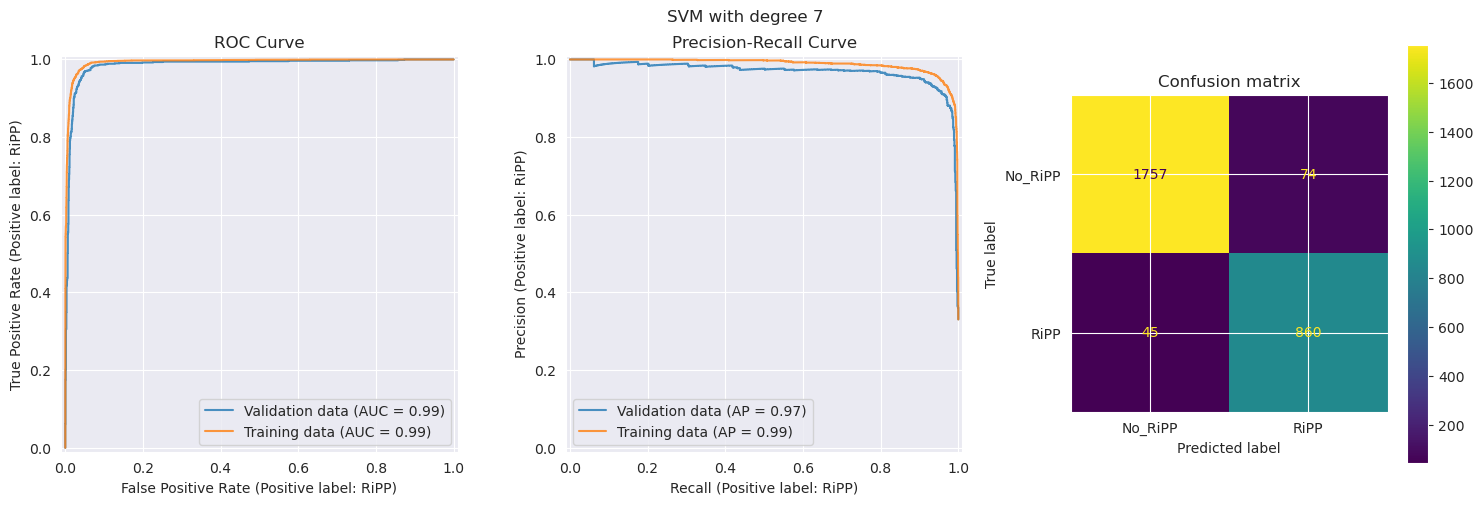

Feature length: 0.0545048897 ± 0.0020500008
Feature SVGER10: 0.0399894994 ± 0.0036466185
Feature aliphatic: 0.0261029356 ± 0.0025184571
Feature charge: 0.0200422738 ± 0.0020314519
Feature boman: 0.0197656083 ± 0.0019033315
Feature instability: 0.0099240520 ± 0.0031109817
Feature T1: 0.0059651007 ± 0.0007994182
Feature SVGER11: 0.0030368334 ± 0.0010023598
Feature PRIN2: 0.0024906234 ± 0.0005209338
Feature ProtFP1: 0.0023844712 ± 0.0009517746
Feature ProtFP3: 0.0022368600 ± 0.0009319663
Feature ProtFP4: 0.0020540658 ± 0.0014269231
Feature KF9: 0.0014345933 ± 0.0001808072
Feature SVGER1: 0.0013712279 ± 0.0005682893
Feature AF3: 0.0006705269 ± 0.0003116575
Feature F1: 0.0006396891 ± 0.0002889150
Feature cys_ser20: 0.0006176621 ± 0.0005241825
Feature Total_coil: 0.0005600297 ± 0.0000989461
Feature Coil50_leader: 0.0005600297 ± 0.0000989461
Feature Coil50_total: 0.0005600297 ± 0.0000989461
Feature Z4: 0.0004858620 ± 0.0002690882
Feature SVGER7: 0.0004455495 ± 0.0007279992
Feature SVGER4: 0.0

In [3]:
x_train, x_test, y_train, y_test = svm_training_split('/lustre/BIF/nobackup/sanz006/training_dataset_leader_v2.csv',feature_list=complete_features)
svc_classification(x_train, x_test, y_train, y_test,feature_list=complete_features)

Grid search of polynomial degree

['RiPP' 'RiPP' 'RiPP' ... 'No_RiPP' 'No_RiPP' 'No_RiPP']
Fitting 39 folds for each of 18 candidates, totalling 702 fits


/lustre/BIF/nobackup/sanz006/miniforge3/envs/ripp/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/lustre/BIF/nobackup/sanz006/miniforge3/envs/ripp/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/lustre/BIF/nobackup/sanz006/miniforge3/envs/ripp/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

{'mean_fit_time': array([175.44550839, 155.7831519 , 129.14512735, 139.80547878,
       145.13168851, 145.16012846, 152.72338845, 118.96345966,
        95.43733217, 107.68398915, 113.21118797, 114.13309215,
       132.80792276,  94.03915933,  78.14369333,  88.7332138 ,
        97.30381386,  97.7258298 ]), 'std_fit_time': array([46.0139725 , 41.48007557, 38.92965394, 41.46419314, 41.77745051,
       37.75332905, 41.86268506, 30.20310033, 24.82845887, 30.22733974,
       32.34127935, 29.47118278, 36.65997297, 23.07189952, 21.05989133,
       23.09798663, 26.81368668, 18.50081273]), 'mean_score_time': array([3.50120951, 3.66399666, 2.1543265 , 2.42078946, 2.43503627,
       3.0862669 , 2.73750239, 2.34718745, 1.71000268, 1.66503588,
       1.72470048, 2.3466224 , 2.14043278, 1.56805988, 1.28017858,
       1.52104782, 1.27648064, 0.84209428]), 'std_score_time': array([6.7254633 , 9.65862199, 4.49876854, 4.82016754, 4.84183962,
       8.73786439, 5.67520929, 6.75381454, 3.68634415, 3.281113

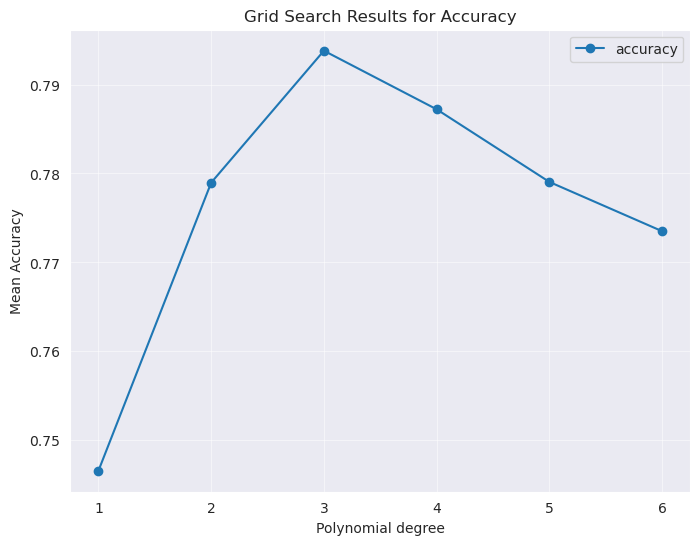

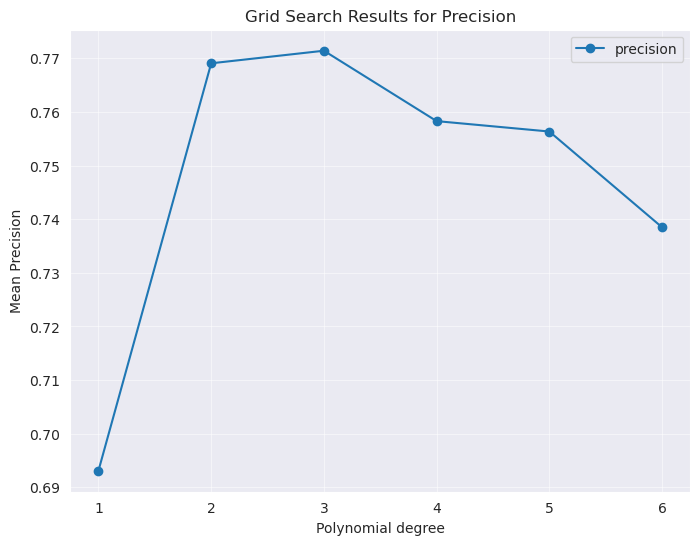

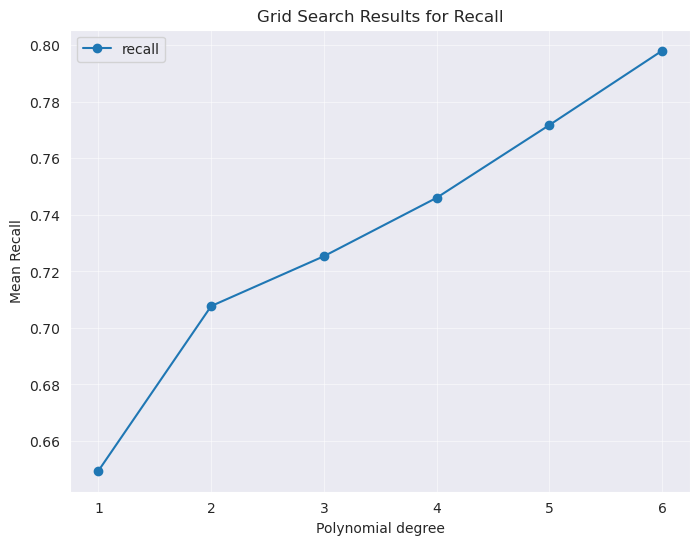

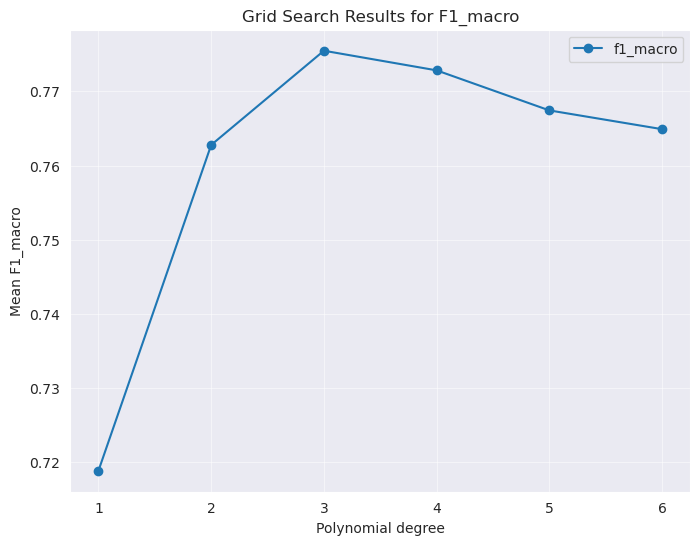

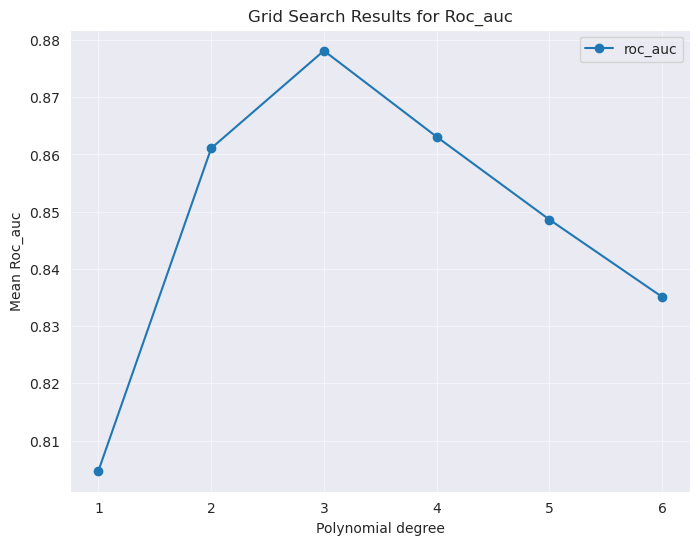

In [3]:
# Define the parameter grid
param_grid = {'degree': [1,2,3,4,5,6], 'C': [ 1, 10,100]}  # Adjust C as needed

# Initialize SVM with polynomial kernel
scoring_metrics = {
    'accuracy': 'accuracy',  # Predefined scorer
    'precision': make_scorer(precision_score, pos_label='RiPP'),
    'recall': make_scorer(recall_score, pos_label='RiPP'),
    'f1_macro': 'f1_macro',  # Predefined scorer
    'roc_auc': 'roc_auc'  # Predefined scorer
}
poly_svm = svm.SVC(kernel='poly',class_weight="balanced")
dataset= pd.read_csv('/lustre/BIF/nobackup/sanz006/positive_training/augmented_training_secstr_dataset_v1.csv')
x,y=x_and_y(dataset,complete_features)
print(y)
my_cv=class_split_iterable(dataset,ripp_classes)
# Perform GridSearchCV
grid_search = GridSearchCV(estimator=poly_svm, param_grid=param_grid, cv=my_cv, scoring=scoring_metrics, verbose=1, n_jobs=30,refit=False,error_score='raise')
grid_search.fit(x, y)

# Extract results
results = grid_search.cv_results_
print(results)
degrees = param_grid['degree']
c= param_grid['C']
for metric in scoring_metrics.keys():
    mean_test_scores = []
    for degree in degrees:
        indices = [
            idx for idx, params in enumerate(results['params']) if params['degree'] == degree
        ]
        mean_test_scores.append(np.mean([results[f'mean_test_{metric}'][idx] for idx in indices]))
    
    # Plot for the current metric
    plt.figure(figsize=(8, 6))
    plt.plot(degrees, mean_test_scores, marker='o', linestyle='-', label=metric)
    plt.xlabel('Polynomial degree')
    plt.ylabel(f'Mean {metric.capitalize()}')
    plt.title(f'Grid Search Results for {metric.capitalize()}')
    plt.xticks(degrees)
    plt.grid(alpha=0.5)
    plt.legend()
    plt.show()


Grid search of C value

Fitting 39 folds for each of 15 candidates, totalling 585 fits


/lustre/BIF/nobackup/sanz006/miniforge3/envs/ripp/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/lustre/BIF/nobackup/sanz006/miniforge3/envs/ripp/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/lustre/BIF/nobackup/sanz006/miniforge3/envs/ripp/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

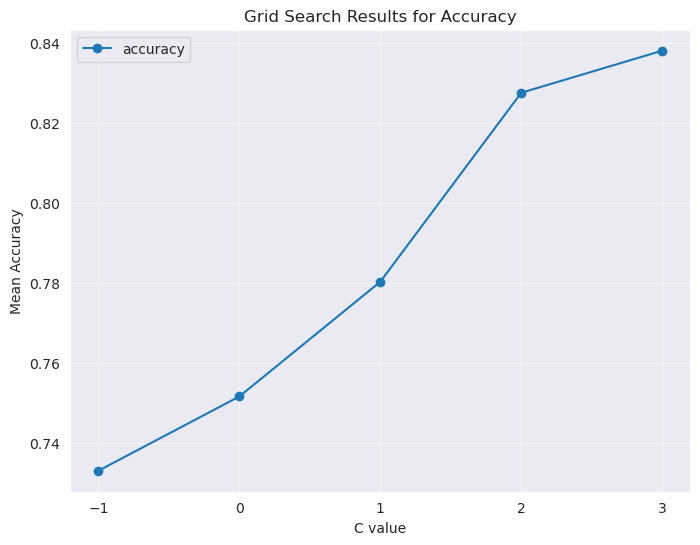

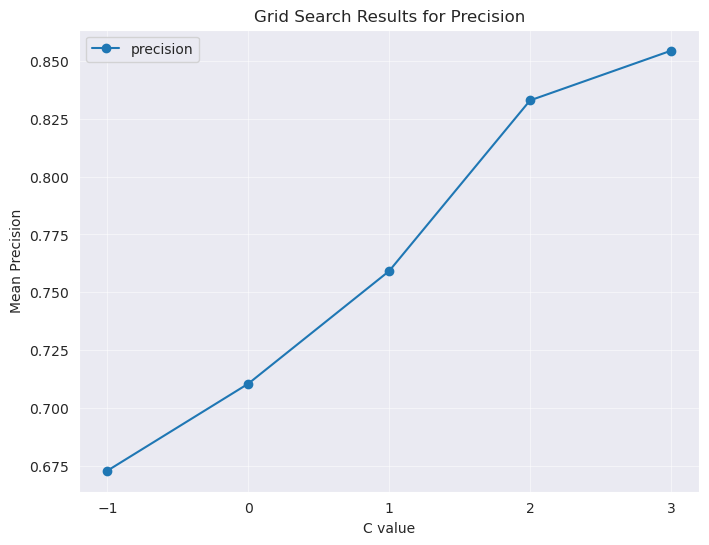

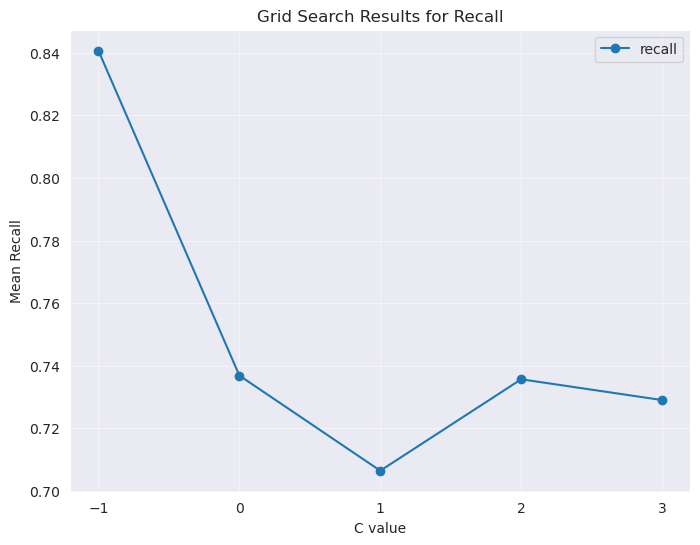

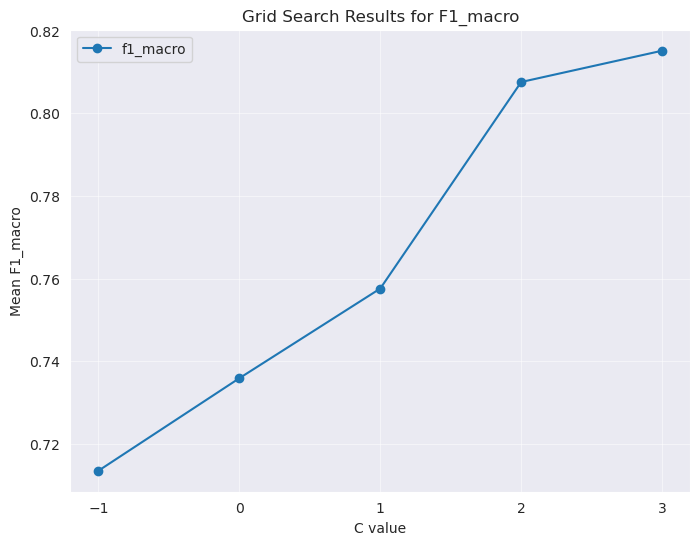

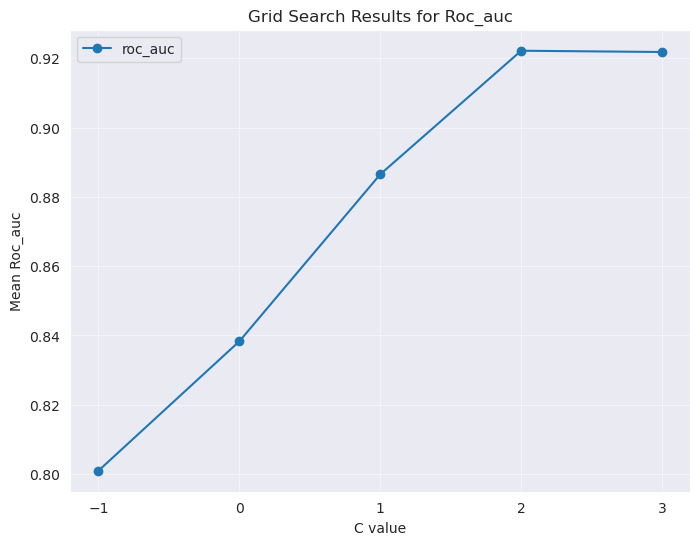

In [5]:
# Define the parameter grid
param_grid = {'degree': [2,3,4], 'C': [0.1, 1, 10,100,1000]}  # Adjust C as needed

# Initialize SVM with polynomial kernel
scoring_metrics = {
    'accuracy': 'accuracy',  # Predefined scorer
    'precision': make_scorer(precision_score, pos_label='RiPP'),
    'recall': make_scorer(recall_score, pos_label='RiPP'),
    'f1_macro': 'f1_macro',  # Predefined scorer
    'roc_auc': 'roc_auc'  # Predefined scorer
}
poly_svm = svm.SVC(kernel='poly',class_weight="balanced")
dataset= pd.read_csv('/lustre/BIF/nobackup/sanz006/positive_training/augmented_training_secstr_dataset_v1.csv')
x,y=x_and_y(dataset,complete_features)
my_cv=class_split_iterable(dataset,ripp_classes)
# Perform GridSearchCV
grid_search = GridSearchCV(estimator=poly_svm, param_grid=param_grid, cv=my_cv, scoring=scoring_metrics, verbose=1, n_jobs=30,refit=False,error_score='raise')
grid_search.fit(x, y)

# Extract results
results = grid_search.cv_results_
degrees = param_grid['degree']
c= param_grid['C']
for metric in scoring_metrics.keys():
    mean_test_scores = []
    for cs in c:
        indices = [
            idx for idx, params in enumerate(results['params']) if params['C'] == cs
        ]
        mean_test_scores.append(np.mean([results[f'mean_test_{metric}'][idx] for idx in indices]))
    
    # Plot for the current metric
    plt.figure(figsize=(8, 6))
    plt.plot(np.log10(c), mean_test_scores, marker='o', linestyle='-', label=metric)
    plt.xlabel('C value')
    plt.ylabel(f'Mean {metric.capitalize()}')
    plt.title(f'Grid Search Results for {metric.capitalize()}')
    plt.xticks(np.log10(c))
    plt.grid(alpha=0.5)
    plt.legend()
    plt.show()


Grid search on C value with class balance

[['Bottromycin']
 ['Bottromycin']
 ['Bottromycin']
 ...
 ['No_RiPP']
 ['No_RiPP']
 ['No_RiPP']]
Fitting 39 folds for each of 15 candidates, totalling 585 fits


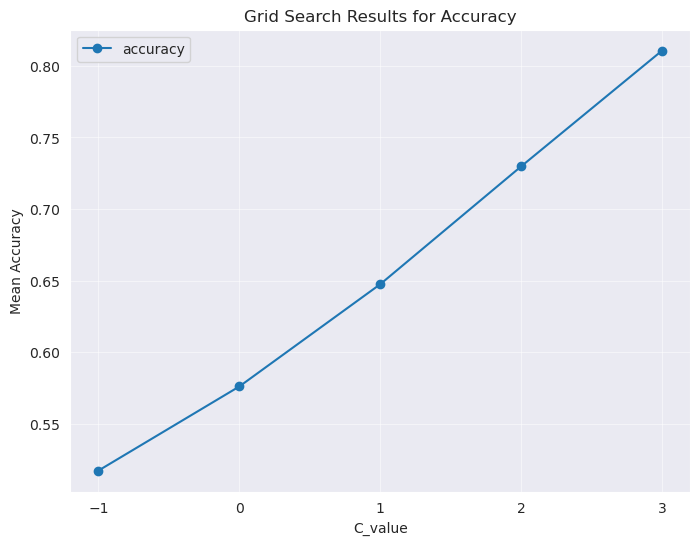

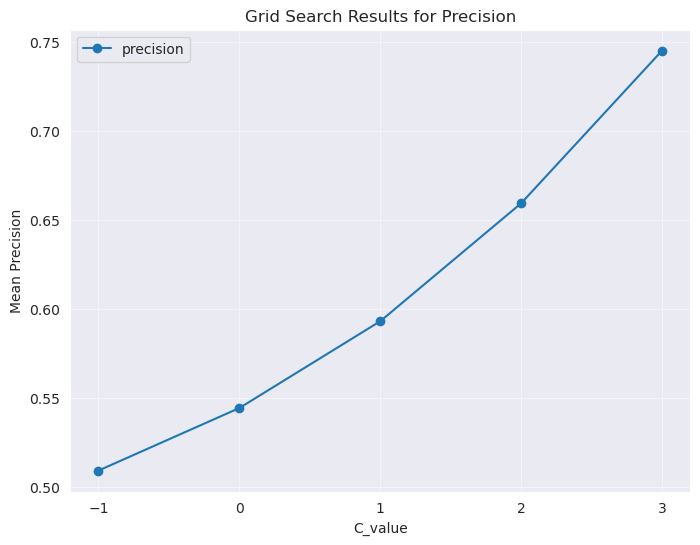

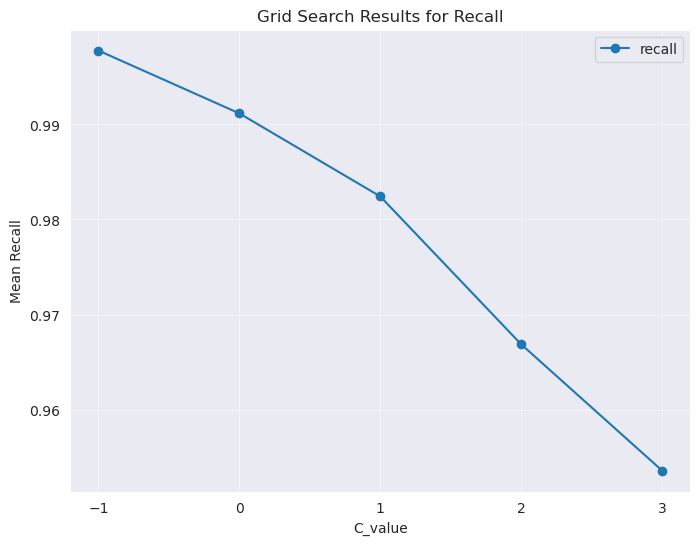

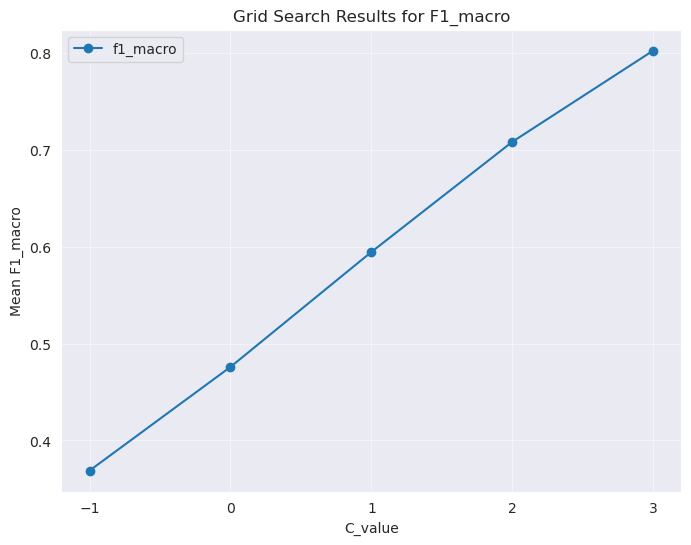

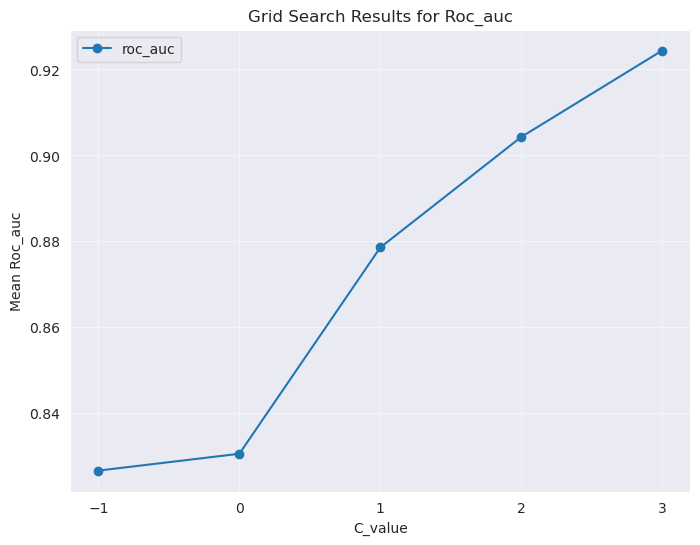

In [6]:
# Define the parameter grid
param_grid = {'degree': [2,3,4], 'C': [0.1, 1, 10,100,1000]}  # Adjust C as needed

# Initialize SVM with polynomial kernel
scoring_metrics = {
    'accuracy': 'accuracy',  # Predefined scorer
    'precision': make_scorer(precision_score, pos_label='RiPP'),
    'recall': make_scorer(recall_score, pos_label='RiPP'),
    'f1_macro': 'f1_macro',  # Predefined scorer
    'roc_auc': 'roc_auc'  # Predefined scorer
}
dataset= pd.read_csv('/lustre/BIF/nobackup/sanz006/positive_training/augmented_training_secstr_dataset_v1.csv')
labels=dataset[['Class']].to_numpy()
print(labels)
labels_flat=labels.flatten()
label_counts=Counter(labels_flat)
total_samples = len(labels)
unique_tags = len(label_counts)

# Calculate weights inversely proportional to frequencies
tag_weights = {tag: total_samples / (unique_tags * count) for tag, count in label_counts.items()}

sample_weights= np.array([tag_weights[label] for label in labels_flat])
poly_svm = svm.SVC(kernel='poly')

x,y=x_and_y(dataset,complete_features)
my_cv=class_split_iterable(dataset,ripp_classes)
# Perform GridSearchCV
grid_search = GridSearchCV(estimator=poly_svm, param_grid=param_grid, cv=my_cv, scoring=scoring_metrics, verbose=1, n_jobs=30,refit=False,error_score='raise')
grid_search.fit(x, y,sample_weight=sample_weights)

# Extract results
results = grid_search.cv_results_
degrees = param_grid['degree']
c= param_grid['C']
for metric in scoring_metrics.keys():
    mean_test_scores = []
    for cs in c:
        indices = [
            idx for idx, params in enumerate(results['params']) if params['C'] == cs
        ]
        mean_test_scores.append(np.mean([results[f'mean_test_{metric}'][idx] for idx in indices]))
    
    # Plot for the current metric
    plt.figure(figsize=(8, 6))
    plt.plot(np.log10(c), mean_test_scores, marker='o', linestyle='-', label=metric)
    plt.xlabel('C_value')
    plt.ylabel(f'Mean {metric.capitalize()}')
    plt.title(f'Grid Search Results for {metric.capitalize()}')
    plt.xticks(np.log10(c))
    plt.grid(alpha=0.5)
    plt.legend()
    plt.show()


Grid search of polynomial degree with class balance

[['Bottromycin']
 ['Bottromycin']
 ['Bottromycin']
 ...
 ['No_RiPP']
 ['No_RiPP']
 ['No_RiPP']]
Fitting 39 folds for each of 18 candidates, totalling 702 fits


/lustre/BIF/nobackup/sanz006/miniforge3/envs/ripp/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'mean_fit_time': array([124.87562084, 125.45587029, 119.79352055, 109.81322123,
       106.28514547, 104.51537981, 125.22558443, 121.3737149 ,
       103.75035862, 101.65085565,  99.01232225,  96.70809081,
       123.38012456, 106.76918955,  90.33196163,  88.9223103 ,
        85.69530167,  84.23290615]), 'std_fit_time': array([10.50630553,  9.91861237,  8.90182155,  8.78712839,  8.45769598,
        7.38387735,  9.20773013, 10.19535428,  7.38089075,  7.22162176,
        7.40413447,  7.17414444,  9.79565753,  7.92713398,  6.49738388,
        6.80073091,  6.12331998,  6.13927721]), 'mean_score_time': array([2.56944578, 2.55139567, 2.46742864, 2.21834627, 2.10137519,
       2.11164769, 2.61537288, 2.49301705, 2.05169704, 1.97928896,
       1.79617006, 1.71175276, 2.59694423, 2.05606876, 1.53310322,
       1.47882122, 1.33781494, 1.0612596 ]), 'std_score_time': array([5.7637783 , 5.73092767, 5.46378706, 4.9488363 , 4.6754942 ,
       4.7756847 , 5.9018305 , 5.67086063, 4.61764191, 4.567664

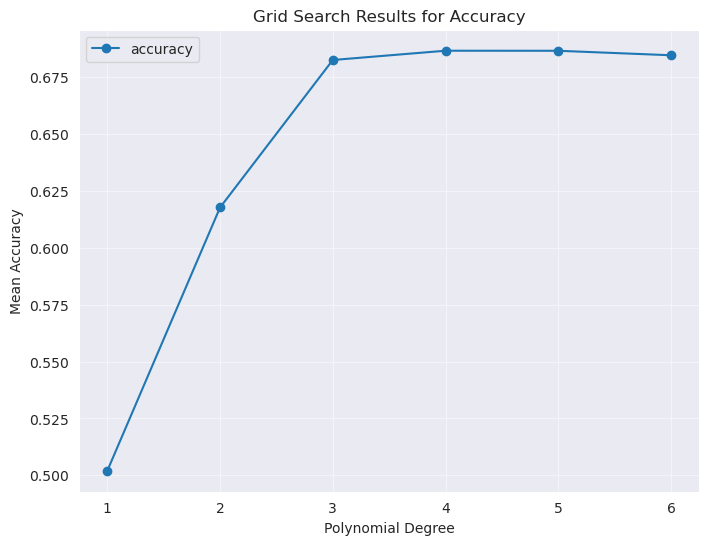

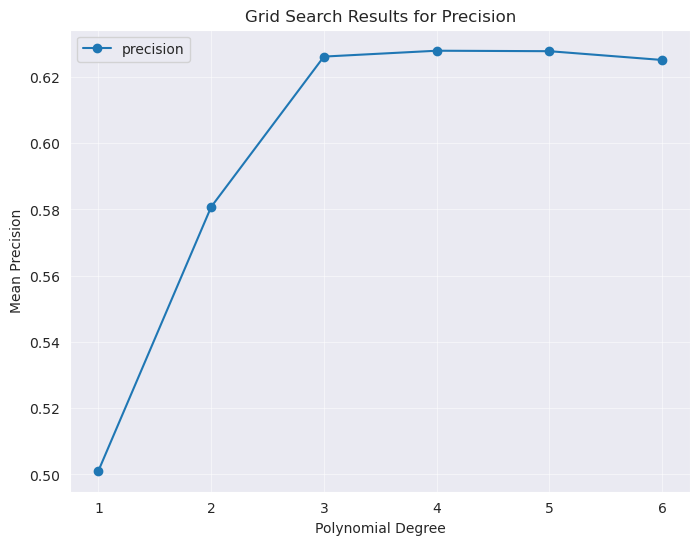

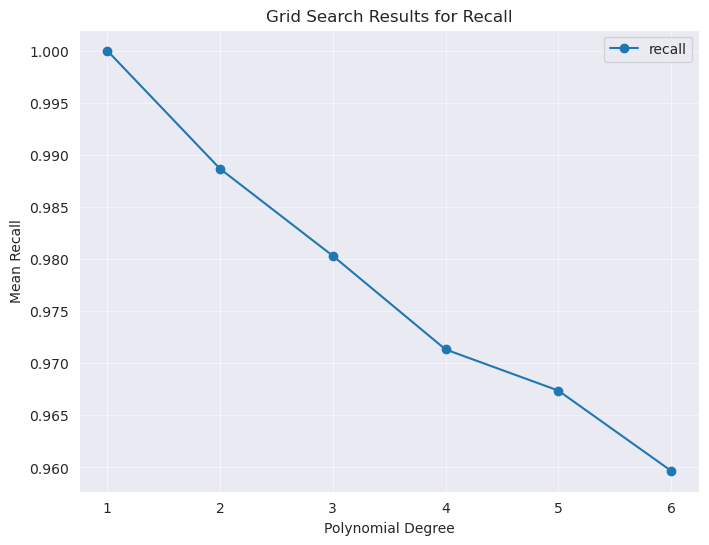

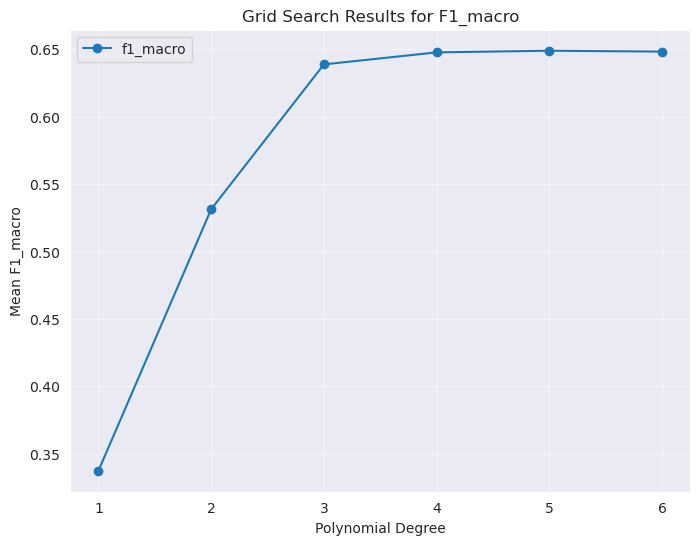

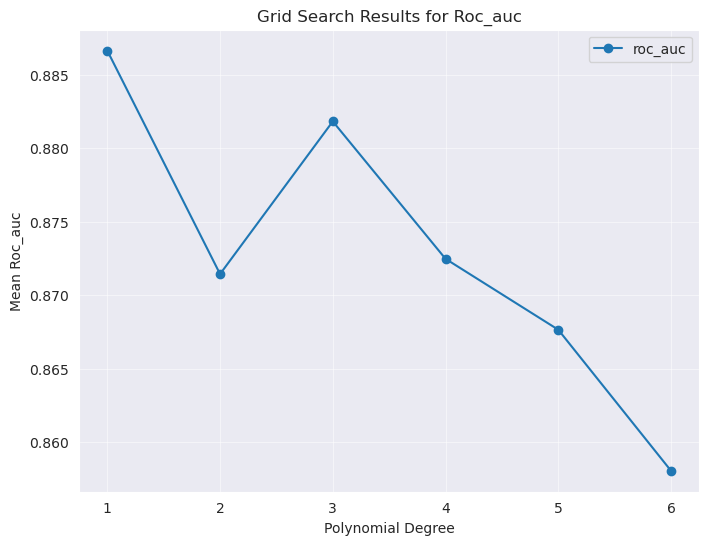

In [4]:
# Define the parameter grid
param_grid = {'degree': [1,2,3,4,5,6], 'C': [ 1, 10,100]}  # Adjust C as needed

# Initialize SVM with polynomial kernel
scoring_metrics = {
    'accuracy': 'accuracy',  # Predefined scorer
    'precision': make_scorer(precision_score, pos_label='RiPP'),
    'recall': make_scorer(recall_score, pos_label='RiPP'),
    'f1_macro': 'f1_macro',  # Predefined scorer
    'roc_auc': 'roc_auc'  # Predefined scorer
}
dataset= pd.read_csv('/lustre/BIF/nobackup/sanz006/positive_training/augmented_training_secstr_dataset_v1.csv')
labels=dataset[['Class']].to_numpy()
print(labels)
labels_flat=labels.flatten()
label_counts=Counter(labels_flat)
total_samples = len(labels)
unique_tags = len(label_counts)

# Calculate weights inversely proportional to frequencies
tag_weights = {tag: total_samples / (unique_tags * count) for tag, count in label_counts.items()}

sample_weights= np.array([tag_weights[label] for label in labels_flat])
poly_svm = svm.SVC(kernel='poly')

x,y=x_and_y(dataset,complete_features)
my_cv=class_split_iterable(dataset,ripp_classes)
# Perform GridSearchCV
grid_search = GridSearchCV(estimator=poly_svm, param_grid=param_grid, cv=my_cv, scoring=scoring_metrics, verbose=1, n_jobs=30,refit=False,error_score='raise')
grid_search.fit(x, y,sample_weight=sample_weights)

# Extract results
results = grid_search.cv_results_
print(results)
degrees = param_grid['degree']
c= param_grid['C']
for metric in scoring_metrics.keys():
    mean_test_scores = []
    for degree in degrees:
        indices = [
            idx for idx, params in enumerate(results['params']) if params['degree'] == degree
        ]
        mean_test_scores.append(np.mean([results[f'mean_test_{metric}'][idx] for idx in indices]))
    
    # Plot for the current metric
    plt.figure(figsize=(8, 6))
    plt.plot(degrees, mean_test_scores, marker='o', linestyle='-', label=metric)
    plt.xlabel('Polynomial Degree')
    plt.ylabel(f'Mean {metric.capitalize()}')
    plt.title(f'Grid Search Results for {metric.capitalize()}')
    plt.xticks(degrees)
    plt.grid(alpha=0.5)
    plt.legend()
    plt.show()


Running model using validated data as validation set and predictions as training

In [3]:
dataset = pd.read_csv('/lustre/BIF/nobackup/sanz006/positive_training/augmented_training_secstr_dataset_v1.csv')

test1=dataset.loc[(dataset['RiPP']=='RiPP')&(dataset['validation']=='yes')]

train1=dataset.loc[(dataset['RiPP']=='No_RiPP')]
#create negative and positive test set
test2=train1.sample(n=4000, axis=0)
test=pd.concat([test1,test2])

train1=train1.drop(test2.index)
train2=dataset.loc[(dataset['RiPP']=='RiPP')&(dataset['validation']=='no')]
train=pd.concat([train1,train2])
x_train=train[complete_features]
x_test=test[complete_features]
y_train=train[["RiPP"]].to_numpy().ravel()
y_test=test[["RiPP"]].to_numpy().ravel()

In [4]:
poly_svc = svm.SVC(C=100,kernel="poly",random_state=0,degree=3,class_weight="balanced")
poly_svc.fit(x_train, y_train)
#f_importances(abs(poly_svc.coef_[0]),feature_list)
y_pred = poly_svc.predict(x_test)
print(y_pred)
print(len(y_pred))
print(len(y_test))
print(x_test.index.values.tolist())
print(len(x_test.index.values.tolist()))
test_indices=x_test.index.values.tolist()

['RiPP' 'RiPP' 'RiPP' ... 'No_RiPP' 'No_RiPP' 'No_RiPP']
4475
4475
[0, 7, 8, 17, 37, 131, 165, 207, 285, 320, 322, 333, 349, 351, 372, 418, 422, 425, 429, 430, 440, 453, 541, 542, 545, 561, 635, 677, 703, 707, 771, 772, 773, 780, 782, 783, 784, 837, 879, 916, 936, 942, 981, 984, 1043, 1053, 1054, 1070, 1105, 1138, 1174, 1215, 1225, 1245, 1252, 1343, 1348, 1351, 1432, 1460, 1494, 1539, 1540, 1571, 1574, 1596, 1606, 1628, 1650, 1665, 1667, 1678, 1679, 1694, 1744, 1749, 1801, 1811, 1818, 1835, 1859, 1865, 1868, 1882, 1913, 1925, 1955, 2023, 2035, 2095, 2096, 2097, 2098, 2133, 2156, 2233, 2270, 2275, 2279, 2281, 2299, 2300, 2323, 2422, 2430, 2432, 2465, 2467, 2533, 2544, 2545, 2566, 2574, 2577, 2584, 2585, 2586, 2590, 2591, 2593, 2595, 2638, 2653, 2680, 2717, 2753, 2775, 2781, 2842, 2913, 2983, 3032, 3101, 3170, 3171, 3230, 3232, 3300, 3307, 3309, 3313, 3317, 3338, 3360, 3418, 3432, 3462, 3477, 3537, 3538, 3553, 3554, 3563, 3575, 3578, 3610, 3620, 3628, 3684, 3763, 3815, 3848, 3849, 3932, 

In [5]:
fn_classes=[]
tp_classes=[]
for i in range(len(y_pred)):
    if y_pred[i]=='No_RiPP' and y_test[i]!='No_RiPP':
        fn_classes.append(dataset['Class'].iloc[test_indices[i]])
    elif y_pred[i]=='RiPP' and y_test[i]=='RiPP':
        tp_classes.append(dataset['Class'].iloc[test_indices[i]])
print(fn_classes)

['Lasso', 'Lasso', 'Lasso', 'N-Formylated TBA', 'Proteusin', 'Dikaritin', 'Lasso', 'Lasso', 'Crocagin', 'Lasso', 'Linear azole-containing peptide', 'Proteusin', 'Lasso', 'Thioamitide', 'Thioamitide', 'Streptide', 'Methanobactin', 'Sulfatyrotide', 'Cyptide', 'Methanobactin', 'Methanobactin', 'Lasso', 'Pantocin', 'Cyptide', 'Cyptide', 'Glycocin', 'other', 'other', 'other', 'other', 'Cyptide', 'Lanthipeptide', 'Cyptide', 'Cyptide', 'Cyclotide']


         No_RiPP  RiPP
No_RiPP     3663   337
RiPP          35   440


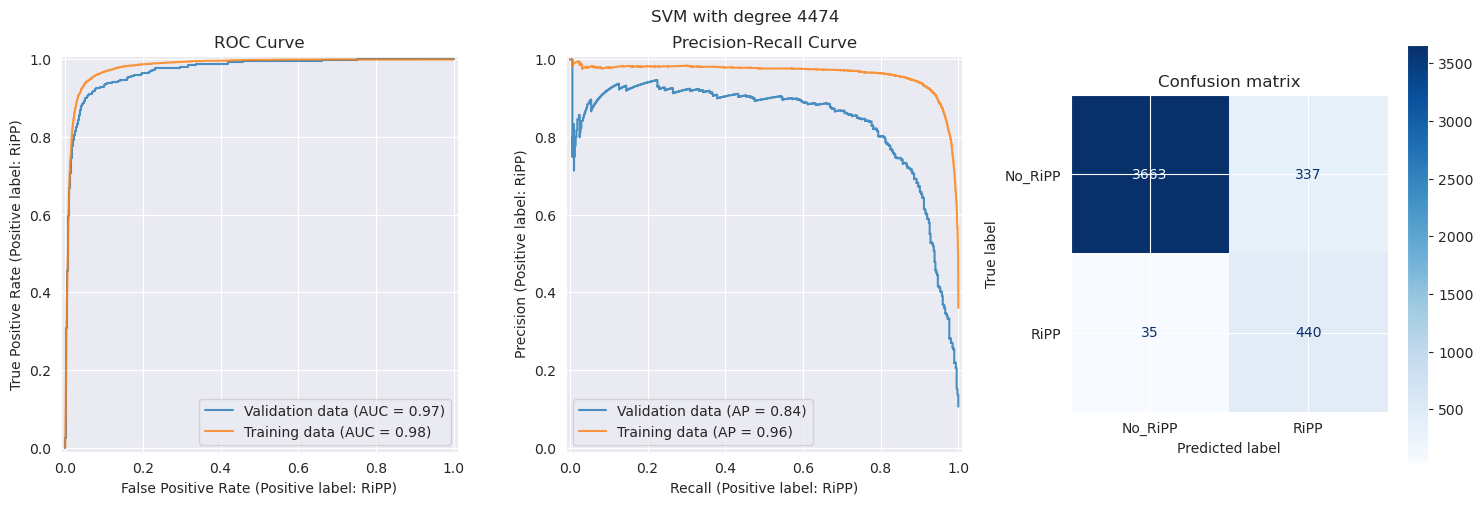

Feature length: 0.0999022105 ± 0.0031010450
Feature aliphatic: 0.0404437368 ± 0.0028746406
Feature boman: 0.0348724211 ± 0.0022727490
Feature instability: 0.0311008421 ± 0.0030763012
Feature charge: 0.0222124211 ± 0.0023457335
Feature PRIN1: 0.0114219474 ± 0.0012847133
Feature Coil50_total: 0.0097417895 ± 0.0008378574
Feature Total_coil: 0.0053846316 ± 0.0005245557
Feature ProtFP1: 0.0020310526 ± 0.0005077483
Feature T1: 0.0016883158 ± 0.0005263897
Feature Coil50_leader: 0.0015983158 ± 0.0002489566
Feature SVGER11: 0.0014160526 ± 0.0004355023
Feature ProtFP2: 0.0012235263 ± 0.0003658813
Feature PRIN2: 0.0011835789 ± 0.0003761994
Feature SVGER7: 0.0011437368 ± 0.0002792473
Feature SVGER1: 0.0008111053 ± 0.0002144558
Feature SVGER4: 0.0007231579 ± 0.0002684963
Feature ProtFP7: 0.0006486842 ± 0.0003072468
Feature Beta50_leader: 0.0005466842 ± 0.0001075852
Feature ProtFP8: 0.0004906316 ± 0.0001310934
Feature KF9: 0.0004830526 ± 0.0001522854
Feature PRIN3: 0.0004790526 ± 0.0002575917
Featur

In [6]:
y_pred = poly_svc.predict(x_test)
print(
    pd.DataFrame(
        confusion_matrix(y_test, y_pred),
        index=poly_svc.classes_,
        columns=poly_svc.classes_
    )
)
fig,axes=plt.subplots(1,3,figsize=(15,5))
RocCurveDisplay.from_estimator(
    poly_svc, x_test, y_test, name="Validation data", ax=axes[0], alpha=0.8
)
RocCurveDisplay.from_estimator(poly_svc,x_train,y_train,name='Training data', ax=axes[0],alpha=0.8)
axes[0].set_title('ROC Curve')
#plt.show()

PrecisionRecallDisplay.from_estimator(poly_svc,x_test,y_test,name='Validation data',ax=axes[1], alpha=0.8)
PrecisionRecallDisplay.from_estimator(poly_svc,x_train,y_train,name='Training data',ax=axes[1], alpha=0.8)
axes[1].set_title('Precision-Recall Curve')
#plt.show()

ConfusionMatrixDisplay.from_estimator(poly_svc,x_test,y_test,ax=axes[2],cmap='Blues')
axes[2].set_title('Confusion matrix')

fig.suptitle(f'SVM with degree {i}')
plt.tight_layout()
plt.show()
# Compute permutation importance
perm_importance = permutation_importance(poly_svc, x_test, y_test, n_repeats=10, scoring='roc_auc', random_state=42,n_jobs=20)
# Display feature importance
for i in perm_importance.importances_mean.argsort()[::-1]:
    print(f"Feature {complete_features[i]}: {perm_importance.importances_mean[i]:.10f} ± {perm_importance.importances_std[i]:.10f}")

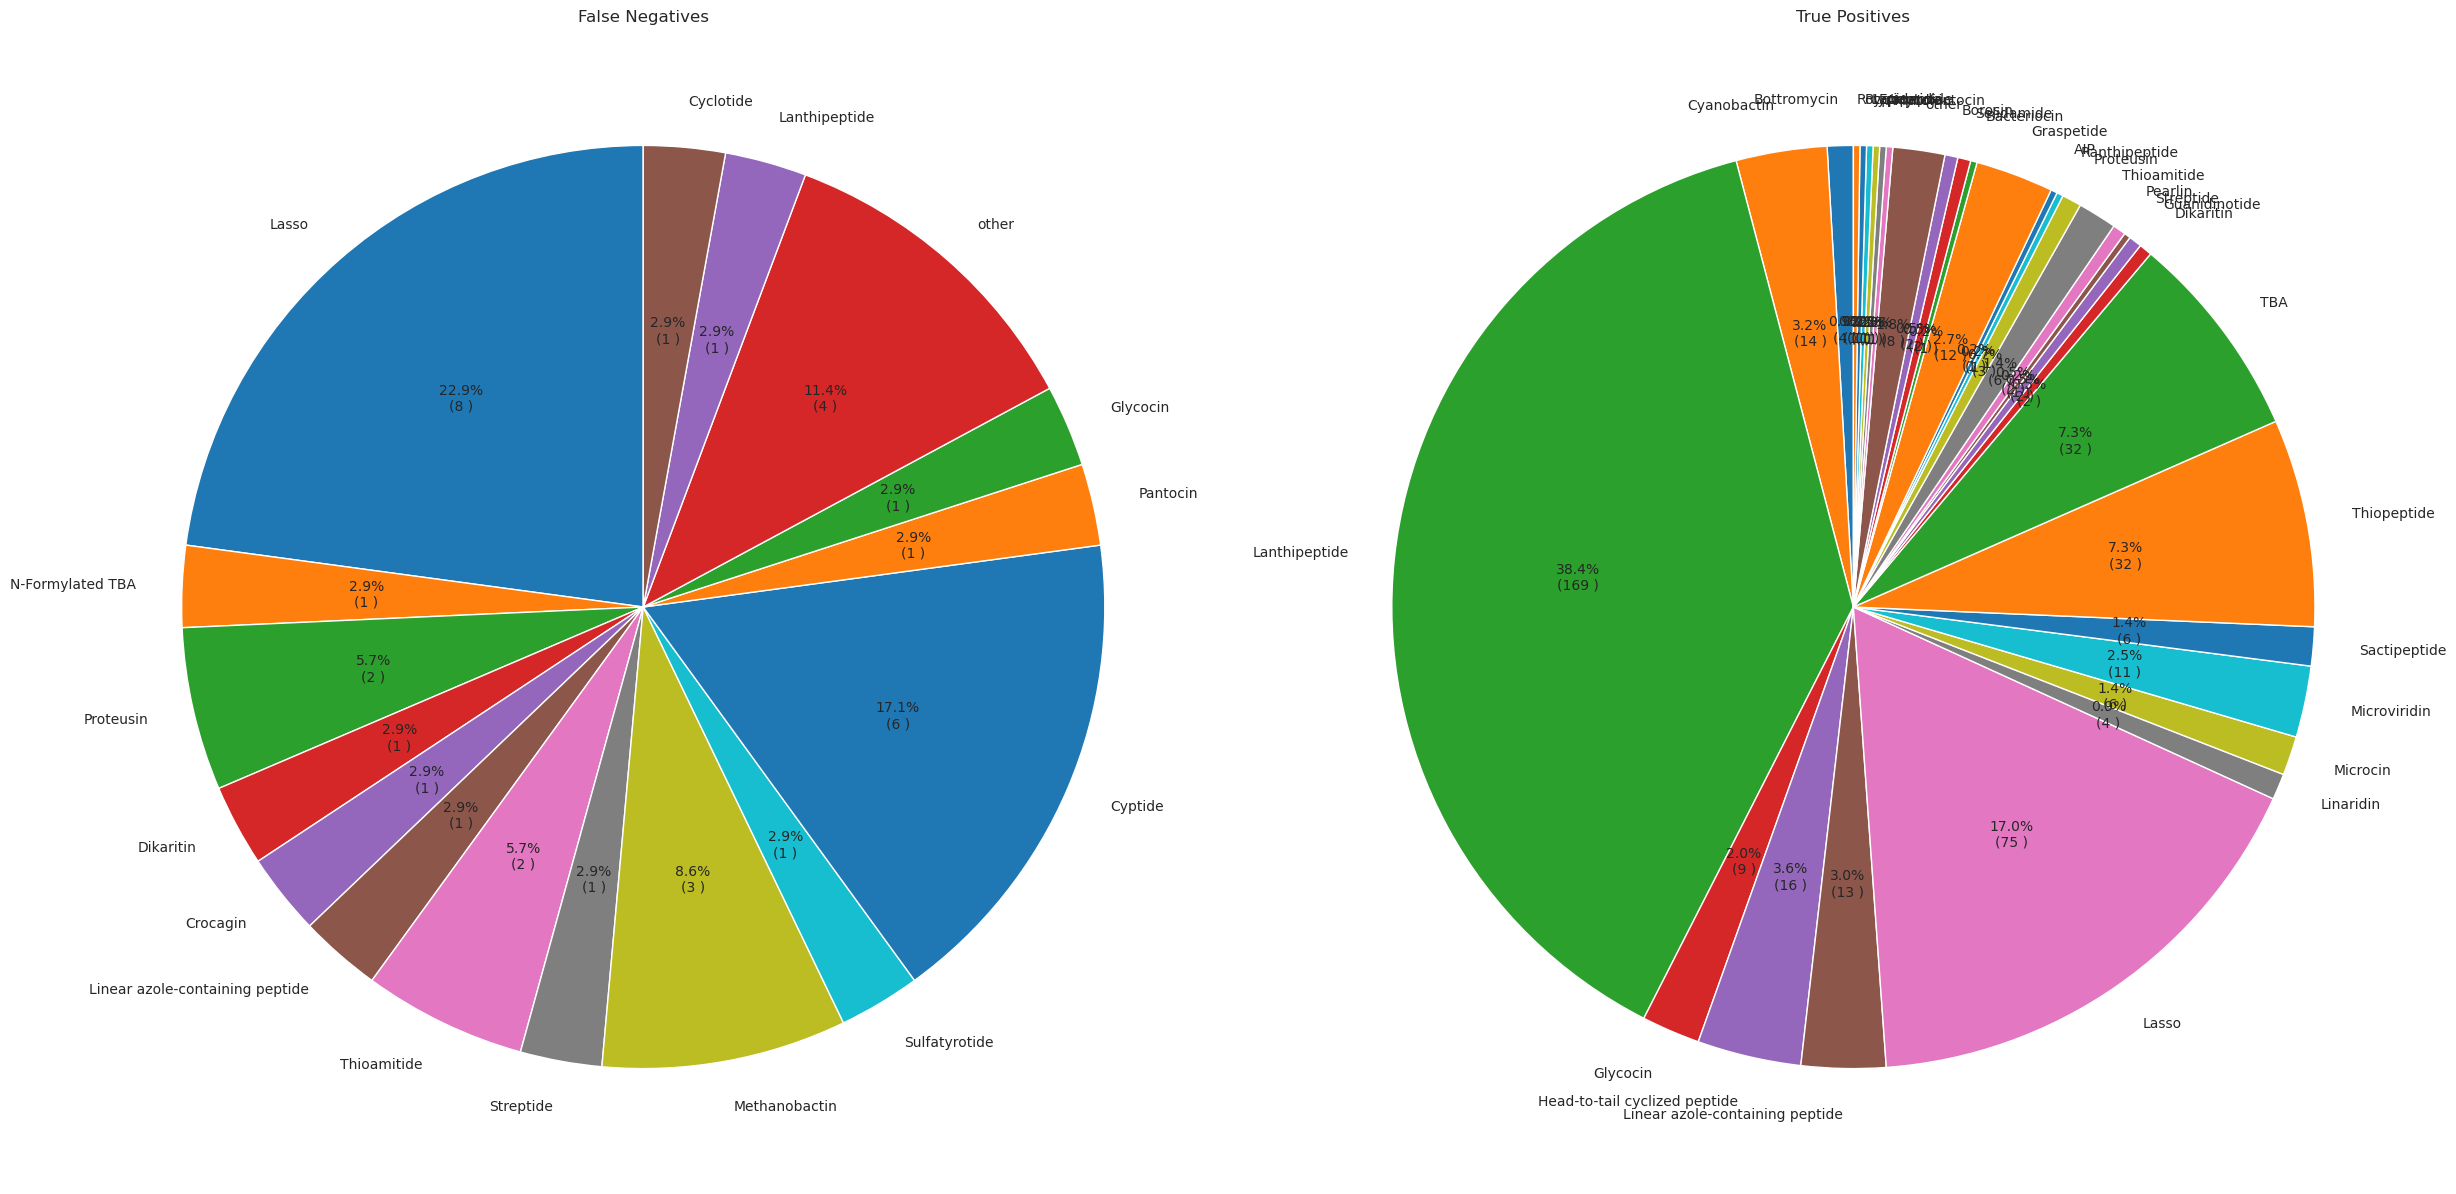

In [18]:
fn_data=[]
fn_labels=[]
for cat in fn_classes:
    if cat not in fn_labels:
        fn_labels.append(cat)
        fn_data.append(fn_classes.count(cat))

tp_data=[]
tp_labels=[]
for cat in tp_classes:
    if cat not in tp_labels:
        tp_labels.append(cat)
        tp_data.append(tp_classes.count(cat))

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d} )"

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(25, 12.5))  # 1 row, 2 columns

# First pie chart
axes[0].pie(fn_data, labels=fn_labels, autopct=lambda pct: func(pct, fn_data), startangle=90)
axes[0].set_title('False Negatives')

# Second pie chart
axes[1].pie(tp_data, labels=tp_labels, autopct=lambda pct: func(pct, tp_data), startangle=90)
axes[1].set_title('True Positives')

# Adjust layout and display
plt.tight_layout()
plt.show()